In [231]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [232]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [290]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    xs = np.zeros_like(t)
    xs[0] = x0
    
    # Calculate step size
    h = (t[-1] - t[0]) / (len(t) - 1)
    # Euler's Method
    for i in range(1, len(xs)):
        xs[i] = xs[i-1] + h*f(xs[i-1], t[i-1])
        
    return xs

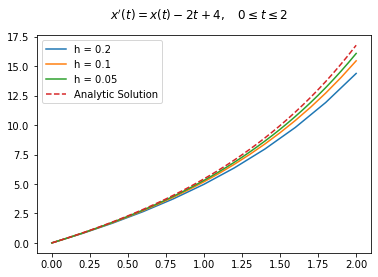

In [301]:
f = lambda x, t: x - 2*t + 4
x0 = 0
hs = [.2, .1, .05]
for h in hs:
    t = np.arange(0, 2+h, h)
    x = euler(f, x0, t)
    plt.plot(t, x, label='h = {}'.format(h))
tf = lambda t: -2 + 2*t + 2*np.exp(t)
plt.plot(t, tf(t), '--', label='Analytic Solution')
plt.legend()
plt.suptitle(r"$x' (t)= x(t) - 2t + 4,\quad 0 \leq t \leq 2$")
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [292]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    xs = np.zeros_like(t)
    xs[0] = x0
    
    # Calculate step size
    h = (t[-1] - t[0]) / (len(t) - 1)
    # Midpoint method
    for i in range(1, len(xs)):
        xs[i] = xs[i-1] + h*f(xs[i-1] + (h/2)*f(xs[i-1], t[i-1]), t[i-1] + h/2)
    return xs

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    if isinstance(x0, int):
        xs = np.zeros_like(t)
        xs[0] = x0
    
        # Calculate step size
        h = (t[-1] - t[0]) / (len(t) - 1)


        for i in range(1, len(t)):
            k1 = f(xs[i-1], t[i-1])
            k2 = f(xs[i-1] + (h/2)*k1, t[i-1] + (h/2))
            k3 = f(xs[i-1] + (h/2)*k2, t[i-1] + (h/2))
            k3 = f(xs[i-1] + (h/2)*k2, t[i-1] + (h/2))
            k4 = f(xs[i-1] + h*k3, t[i])
            xs[i] = xs[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        return xs
    else:   
        xs = np.zeros((len(x0), len(t)))
        xs[:, 0] = x0

        # Calculate step size
        h = (t[-1] - t[0]) / (len(t) - 1)


        for i in range(1, len(t)):
            # t_i_arr = np.ones_like(xs[:, i-1]) * t[i-1]
            k1 = f(xs[:, i-1], t[i-1])
            k2 = f(xs[:, i-1] + (h/2)*k1, t[i-1] + (h/2))
            k3 = f(xs[:, i-1] + (h/2)*k2, t[i-1] + (h/2))
            k3 = f(xs[:, i-1] + (h/2)*k2, t[i-1] + (h/2))
            k4 = f(xs[:, i-1] + h*k3, t[i])
            xs[:, i] = xs[:, i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        return xs

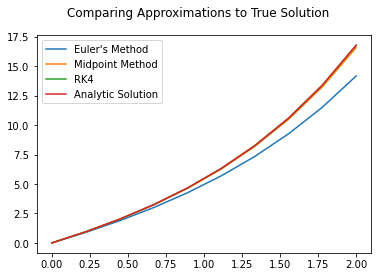

In [293]:
# Part 1

f = lambda x, t: x - 2*t + 4
true_f = lambda t: -2 + 2*t + 2*np.exp(t)

x0 = 0

# Graph true solution alongside approximation from each method with h = 0.2
t = np.linspace(0, 2, int(2/.2))

x_e = euler(f, x0, t)
x_m = midpoint(f, x0, t)
x_r = rk4(f, x0, t)
x_t = true_f(t)

plt.plot(t, x_e, label='Euler\'s Method')
plt.plot(t, x_m, label='Midpoint Method')
plt.plot(t, x_r, label='RK4')
plt.plot(t, x_t, label='Analytic Solution')

plt.suptitle('Comparing Approximations to True Solution')
plt.legend()
plt.show()

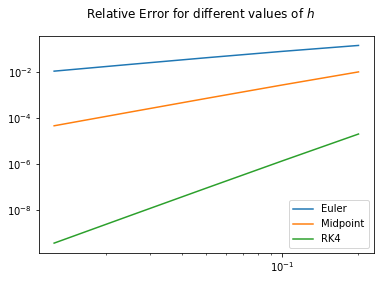

In [299]:
hs = [.2, .1, .05, 0.025, 0.0125]
x_e_err = []
x_m_err = []
x_r_err = []

for h in hs:
    # Part 1
    f = lambda x, t: x - 2*t + 4
    true_f = lambda t: -2 + 2*t + 2*np.exp(t)

    x0 = 0
    t = np.arange(0, 2+h, h)
    
    x_e = euler(f, x0, t)
    x_m = midpoint(f, x0, t)
    x_r = rk4(f, x0, t)
    
    x_e_err.append(abs(true_f(2) - x_e[-1])/abs(true_f(2)))
    x_m_err.append(abs(true_f(2) - x_m[-1])/abs(true_f(2)))
    x_r_err.append(abs(true_f(2) - x_r[-1])/abs(true_f(2)))

plt.loglog(hs, x_e_err, label='Euler')
plt.loglog(hs, x_m_err, label='Midpoint')
plt.loglog(hs, x_r_err, label='RK4')
plt.legend()
plt.suptitle(r"Relative Error for different values of $h$")
plt.show()


## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

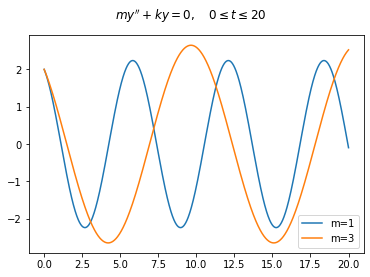

In [295]:
k1, m1 = 1, 1
f_1 = lambda y,t: np.array([y[1], -k1/m1*y[0]])
k2, m2 = 1, 3
f_2 = lambda y,t: np.array([y[1], -k2/m2*y[0]])
t = np.linspace(0, 20, 1000)
y_0 = 2
y_prime_0 = -1

results_1 = rk4(f_1, np.array([y_0, y_prime_0]), t)
results_2 = rk4(f_2, np.array([y_0, y_prime_0]), t)

plt.plot(t, results_1[0,:], label='m=1')
plt.plot(t, results_2[0,:], label='m=3')
plt.legend()
plt.suptitle(r"$my'' + ky = 0,\quad 0 \leq t \leq 20$")
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

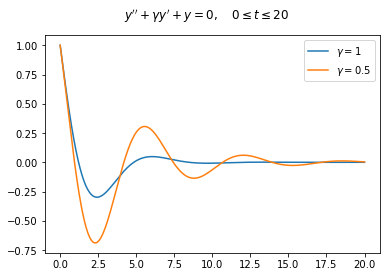

In [296]:
gammas = [1, 1/2]
for gam in gammas:
    f_1 = lambda y,t: np.array([y[1], -gam * y[1] - y[0]])

    t = np.linspace(0, 20, 1000)
    y_0 = 1
    y_prime_0 = -1

    results_1 = rk4(f_1, np.array([y_0, y_prime_0]), t)

    plt.plot(t, results_1[0,:], label=r'$\gamma = {}$'.format(gam))
plt.legend()
plt.suptitle(r"$y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20$")
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

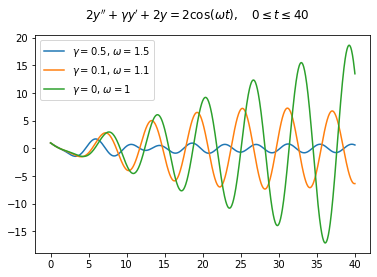

In [297]:
gam_ome = [(.5, 1.5), (0.1, 1.1), (0, 1)]
for gam, ome in gam_ome:
    f = lambda y,t: np.array([y[1], -gam*y[1]/2 - y[0] + np.cos(ome*t)])

    t = np.linspace(0, 40, 1000)
    y_0 = 1
    y_prime_0 = -1

    results_1 = rk4(f, np.array([y_0, y_prime_0]), t)

    plt.plot(t, results_1[0,:], 
             label=r'$\gamma = {}$, $\omega = {}$'.format(gam,ome))
plt.legend()
plt.suptitle(r"$2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40$")
plt.show()